<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Ames Housing Data and Kaggle Challenge

## Problem Statement
---

Being a personal assistant to an ultrarich family, my new task is to help them increase their vacation house value. 
<br>
Hence, I've gathered data from 2006 to 2010 to determine which features can help to increase the house value.
<br>
Additionally, to advise on which features to avoid to prevent decreasing the house value.

## Contents:
---
- [Data Cleaning](#Data-Cleaning)
- [EDA](#EDA)
- [Preprocessing and Modeling](#Preprocessing-and-Modeling)
- [Model Comparison](#Model-Comparison)
- [Diving into Lasso Model](#Diving-into-Lasso-Model)
- [Kaggle](#Kaggle)
- [Conclusions and Recommendations](#Conclusion-and-Recommendations)

## Data Cleaning
---

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import KNNImputer, IterativeImputer, SimpleImputer
from sklearn import metrics

In [2]:
ames_house = pd.read_csv("./datasets/train.csv")

<br>

### Simple exploration on the data gathered

In [3]:
ames_house.shape

(2051, 81)

In [4]:
ames_house.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [5]:
ames_house.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [6]:
ames_house.tail()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0,7558,Pave,NaN,Reg,Bnk,...,0,0,NaN,NaN,NaN,0,3,2009,WD,177000
2049,639,535179160,20,RL,80.0,10400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2009,WD,144000
2050,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,189000


### Cleaning based on null values proportion in the column

In [7]:
((ames_house.isnull().sum())/2051).sort_values(ascending=False)

Pool QC         0.995612
Misc Feature    0.968308
Alley           0.931741
Fence           0.804973
Fireplace Qu    0.487567
                  ...   
Heating QC      0.000000
Central Air     0.000000
Electrical      0.000000
1st Flr SF      0.000000
SalePrice       0.000000
Length: 81, dtype: float64

**The 4 columns (Pool QC, Misc Feature, Alley and Fence) were dropped as it will not be deterministic with the number of nulls in the column.**
<br>
_To note, the null values represent no pool, no features, no alley access and no fence respectively_
<br>
_Using 80% as the threshold to determine if the column should be dropped due to the number of null values_

In [8]:
ames_house.drop(["Pool QC", 
                 "Misc Feature", 
                 "Alley", 
                 "Fence"], 
                axis=1, 
                inplace=True)


<br>
After dropping, to check the shape and the existing columns with null values

In [9]:
ames_house.shape

(2051, 77)

In [10]:
ames_house.isnull().sum().sort_values(ascending=False)

Fireplace Qu     1000
Lot Frontage      330
Garage Cond       114
Garage Yr Blt     114
Garage Finish     114
                 ... 
PID                 0
Heating             0
Heating QC          0
Central Air         0
SalePrice           0
Length: 77, dtype: int64

In [11]:
# Check the total number of null values

ames_house.isnull().sum().sum() 

2232

In [12]:
# Check the total number of columns with null values

len(ames_house.columns[ames_house.isnull().any()].tolist()) 

22

In [13]:
# Check the columns with null values
    
ames_house.columns[ames_house.isnull().any()].tolist()

['Lot Frontage',
 'Mas Vnr Type',
 'Mas Vnr Area',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Fireplace Qu',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond']

<br>

### Creating a function to clean the null values for categorical columns

In [14]:
def replace_null (df, replace_dict):
    
    # to replace null values in columns related to columns in the dict with respectives values
    
    for i, k in replace_dict.items():
        df[i] = df[i].fillna(k)
        
    
    # to replace null values in columns related to Basement with dtype as object
    
    Bsmt_list = [col for col in df.columns if "Bsmt" in col and df[col].dtype == object]
    
    
    for Bsmt in Bsmt_list:
        df[Bsmt] = df[Bsmt].fillna("No Basement")
    
    
    # to replace null values in columns related to Garage with dtype as object
    
    Garage_list = [col for col in df.columns if 'Garage' in col and df[col].dtype == object]
    
    
    for Garage in Garage_list:
        df[Garage] = df[Garage].fillna("No Garage")

In [15]:
# A dictionary for columns to replace null values

replace_dict = {
    "Mas Vnr Type" : "No veneer",
    "Fireplace Qu" : "No Fireplace",
}

In [16]:
replace_null(ames_house, replace_dict)

<br>

Check the null values were clean properly by the function

In [17]:
# check that null values for numerical columns were not affected

ames_house.loc[ames_house["BsmtFin SF 1"].isnull(),["BsmtFin SF 1"]] 

,BsmtFin SF 1
1327,NaN


In [18]:
# check that null values for intended categorical columns were affected

ames_house.loc[ames_house["Bsmt Qual"].isnull(),["Bsmt Qual"]] 

,Bsmt Qual


In [19]:
# double check that null values for numerical columns were not affected

ames_house.loc[ames_house["Garage Cars"].isnull(),["Garage Cars"]] 

,Garage Cars
1712,NaN


In [20]:
# double check that null values for intended categorical columns were affected

ames_house.loc[ames_house["Garage Type"].isnull(),["Garage Type"]] 

,Garage Type


### Cleaning null values in Garage related columns

In [21]:
ames_house.isnull().sum().sum()

476

In [22]:
ames_house.isnull().sum().sort_values(ascending=False)

Lot Frontage      330
Garage Yr Blt     114
Mas Vnr Area       22
Bsmt Half Bath      2
Bsmt Full Bath      2
                 ... 
Exterior 2nd        0
Exterior 1st        0
Roof Matl           0
Roof Style          0
SalePrice           0
Length: 77, dtype: int64

In [23]:
[col for col in ames_house.columns if "Garage" in col]

['Garage Type',
 'Garage Yr Blt',
 'Garage Finish',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond']

<br>

Check if the rows under 'Garage Yr Blt' with null values are for house with no garage

In [24]:
ames_house.loc[(ames_house['Garage Type'] == 'No Garage') & 
               (ames_house['Garage Yr Blt'].isnull())
              ]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
28,2243,911103060,190,C (all),75.0,8250,Pave,Reg,Lvl,AllPub,...,0,133,0,0,0,0,6,2007,WD,119600
53,330,923226250,160,RM,21.0,1476,Pave,Reg,Lvl,AllPub,...,26,0,0,0,0,0,3,2010,WD,76000
65,2278,923202134,20,RL,70.0,8402,Pave,Reg,Lvl,AllPub,...,30,0,0,0,0,0,12,2007,New,147000
79,2235,910201050,50,RM,50.0,7288,Pave,Reg,Lvl,AllPub,...,0,0,176,0,0,0,9,2007,WD,129850
101,2084,905476170,30,RL,58.0,9098,Pave,IR1,Lvl,AllPub,...,0,144,0,0,0,0,7,2007,WD,86000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,325,923204150,90,RL,94.0,9400,Pave,Reg,Low,AllPub,...,0,0,0,0,0,0,4,2010,WD,139000
2010,2880,911175410,30,C (all),69.0,12366,Pave,Reg,Lvl,AllPub,...,0,23,0,0,0,0,10,2006,WD,51689
2027,2628,535456010,90,RL,75.0,8512,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,0,9,2006,WD,119000
2039,2288,923228220,160,RM,21.0,1495,Pave,Reg,Lvl,AllPub,...,64,0,0,0,0,0,5,2007,WD,93900


In [25]:
ames_house.loc[ames_house['Garage Type'] == 'No Garage', ['Garage Type']].count()

Garage Type    113
dtype: int64

<br>

Since there are 114 rows under 'Garage Yr Blt' with null values, while, there are only 113 rows with 'No Garage' and null value for 'Garage Yr Blt', investigation is required to find the row with wrong value

In [26]:
ames_house.loc[(ames_house['Garage Type'] != 'No Garage') & 
               (ames_house['Garage Yr Blt'].isnull()),
               ['Garage Type', 
                'Garage Finish', 
                'Garage Cars', 
                'Garage Area', 
                'Garage Qual', 
                'Garage Cond']]

,Garage Type,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
1712,Detchd,No Garage,NaN,NaN,No Garage,No Garage


Since most of the Garage features are null value / 'No Garage', 'Garage type' for 1712 will need to be amended

In [27]:
ames_house.loc[1712,'Garage Type'] = 'No Garage' 

Check that there are 114 rows with "No Garage" value and null values in Garage Yr Blt column

In [28]:
ames_house.loc[(ames_house['Garage Type'] == 'No Garage') & 
               (ames_house['Garage Yr Blt'].isnull())
              ]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
28,2243,911103060,190,C (all),75.0,8250,Pave,Reg,Lvl,AllPub,...,0,133,0,0,0,0,6,2007,WD,119600
53,330,923226250,160,RM,21.0,1476,Pave,Reg,Lvl,AllPub,...,26,0,0,0,0,0,3,2010,WD,76000
65,2278,923202134,20,RL,70.0,8402,Pave,Reg,Lvl,AllPub,...,30,0,0,0,0,0,12,2007,New,147000
79,2235,910201050,50,RM,50.0,7288,Pave,Reg,Lvl,AllPub,...,0,0,176,0,0,0,9,2007,WD,129850
101,2084,905476170,30,RL,58.0,9098,Pave,IR1,Lvl,AllPub,...,0,144,0,0,0,0,7,2007,WD,86000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,325,923204150,90,RL,94.0,9400,Pave,Reg,Low,AllPub,...,0,0,0,0,0,0,4,2010,WD,139000
2010,2880,911175410,30,C (all),69.0,12366,Pave,Reg,Lvl,AllPub,...,0,23,0,0,0,0,10,2006,WD,51689
2027,2628,535456010,90,RL,75.0,8512,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,0,9,2006,WD,119000
2039,2288,923228220,160,RM,21.0,1495,Pave,Reg,Lvl,AllPub,...,64,0,0,0,0,0,5,2007,WD,93900


In [29]:
ames_house.loc[ames_house['Garage Type'] == 'No Garage', 
               ['Garage Type',
                'Garage Yr Blt',
                'Garage Finish',
                'Garage Cars',
                'Garage Area',
                'Garage Qual',
                'Garage Cond']]

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond
28,No Garage,NaN,No Garage,0.0,0.0,No Garage,No Garage
53,No Garage,NaN,No Garage,0.0,0.0,No Garage,No Garage
65,No Garage,NaN,No Garage,0.0,0.0,No Garage,No Garage
79,No Garage,NaN,No Garage,0.0,0.0,No Garage,No Garage
101,No Garage,NaN,No Garage,0.0,0.0,No Garage,No Garage
...,...,...,...,...,...,...,...
1991,No Garage,NaN,No Garage,0.0,0.0,No Garage,No Garage
2010,No Garage,NaN,No Garage,0.0,0.0,No Garage,No Garage
2027,No Garage,NaN,No Garage,0.0,0.0,No Garage,No Garage
2039,No Garage,NaN,No Garage,0.0,0.0,No Garage,No Garage


Additional checks on the 'No Garage' counts are the same throughout the categorical columns

In [30]:
Garage_list_obj = [gcol for gcol in ames_house.columns if "Garage" in gcol and ames_house[gcol].dtype == object]
Garage_list_obj

['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']

In [31]:
for gcol in Garage_list_obj:
    print(gcol)
    print(ames_house[gcol].value_counts()['No Garage'])

Garage Type
114
Garage Finish
114
Garage Qual
114
Garage Cond
114


<br> 
Now focusing on the null values in the Garage related numerical columns

In [32]:
Garage_list_float = [gfcol for gfcol in ames_house.columns if 'Garage' in gfcol and ames_house[gfcol].dtype == float]

Additional checks on the null value counts are the same throughout the numerical columns

In [33]:
for gfcol in Garage_list_float:
    ames_house[gfcol] = ames_house[gfcol].fillna(0.0)
    print(gfcol)
    print(ames_house[gfcol].value_counts()[0])

Garage Yr Blt
114
Garage Cars
114
Garage Area
114


### Cleaning null values in Basement related columns

In [34]:
len(ames_house.columns[ames_house.isnull().any()].tolist())

8

In [35]:
ames_house.columns[ames_house.isnull().any()].tolist()

['Lot Frontage',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath']

In [36]:
Bsmt_list = [bcol for bcol in ames_house.columns if "Bsmt" in bcol]
Bsmt_list

['Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin SF 1',
 'BsmtFin Type 2',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath']

<br>
Using .loc to take a quick glance on the row with null values

In [37]:
ames_house.loc[ames_house['Bsmt Qual'] == 'No Basement', 
               ['Bsmt Qual',
                'Bsmt Cond',
                'Bsmt Exposure',
                'BsmtFin Type 1',
                'BsmtFin SF 1',
                'BsmtFin Type 2',
                'BsmtFin SF 2',
                'Bsmt Unf SF',
                'Total Bsmt SF',
                'Bsmt Full Bath',
                'Bsmt Half Bath']]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
12,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,0.0,0.0
93,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,0.0,0.0
114,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,0.0,0.0
146,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,0.0,0.0
183,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,0.0,0.0
240,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,0.0,0.0
249,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,0.0,0.0
256,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,0.0,0.0
390,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,0.0,0.0
437,No Basement,No Basement,No Basement,No Basement,0.0,No Basement,0.0,0.0,0.0,0.0,0.0


Clean the numerical null values for basement related numerical columns. Additionally, doing checks on the null value counts are the same throughout the numerical columns

In [38]:
Bsmt_list_float = [bfcol for bfcol in ames_house.columns if 'Bsmt' in bfcol and ames_house[bfcol].dtype == float]

for bfcol in Bsmt_list_float:
    ames_house[bfcol] = ames_house[bfcol].fillna(0.0)

<br>
Additional checks on the 'No Basement' counts are the same throughout the categorical columns

In [39]:
Bsmt_list_obj = [bocol for bocol in ames_house.columns if "Bsmt" in bocol and ames_house[bocol].dtype == object]
Bsmt_list_obj

['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']

In [40]:
for bocol in Bsmt_list_obj:
    print(bocol)
    print(ames_house[bocol].value_counts()['No Basement'])

Bsmt Qual
55
Bsmt Cond
55
Bsmt Exposure
58
BsmtFin Type 1
55
BsmtFin Type 2
56


<br>
Since there are discrepancies in the number of 'No Basement' values, further investigation will be required

In [41]:
ames_house.loc[((ames_house['Bsmt Qual'] != 'No Basement') &  
                (ames_house['Bsmt Exposure'] == 'No Basement')) |
               ((ames_house['Bsmt Qual'] != 'No Basement') &  
                (ames_house['BsmtFin Type 2'] == 'No Basement')),
                ['Bsmt Qual',
                'Bsmt Cond',
                'Bsmt Exposure',
                'BsmtFin Type 1',
                'BsmtFin SF 1',
                'BsmtFin Type 2',
                'BsmtFin SF 2',
                'Bsmt Unf SF',
                'Total Bsmt SF',
                'Bsmt Full Bath',
                'Bsmt Half Bath']]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
1147,Gd,TA,No,GLQ,1124.0,No Basement,479.0,1603.0,3206.0,1.0,0.0
1456,Gd,TA,No Basement,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0
1547,Gd,TA,No Basement,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
1997,Gd,TA,No Basement,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0


Row 1147 has 'No Basement' for BsmtFin Type 2 column while the other columns indicate there is basement for this data entry
<br>
Row 1456, 1547 and 1997 have 'No Basement' for Bsmt Exposure column while the other columns indicate there are basements for these data entries

Since these are categorical feature, will be using mode to determine the value to replace the null values in the rows above

In [42]:
ames_house["BsmtFin Type 2"].mode()

0    Unf
dtype: object

In [43]:
ames_house.loc[1147, 'BsmtFin Type 2'] = 'Unf'

In [44]:
ames_house["Bsmt Exposure"].mode()

0    No
dtype: object

In [45]:
ames_house.loc[[1456, 1547, 1997], 'Bsmt Exposure'] = 'No'


### Cleaning null values in Mas Vnr Area

In [46]:
ames_house.isnull().sum().sort_values(ascending = False)

Lot Frontage    330
Mas Vnr Area     22
Id                0
Half Bath         0
Fireplaces        0
               ... 
Mas Vnr Type      0
Exterior 2nd      0
Exterior 1st      0
Roof Matl         0
SalePrice         0
Length: 77, dtype: int64

<br>

Check if Mas Vnr Area is null due to no Veneer

In [47]:
ames_house.loc[(ames_house['Mas Vnr Type'] == 'No veneer') & 
               (ames_house['Mas Vnr Area'].isnull())
              ]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
22,2393,528142010,60,RL,103.0,12867,Pave,IR1,Lvl,AllPub,...,142,0,0,0,0,0,7,2006,New,344133
41,2383,528110050,20,RL,107.0,13891,Pave,Reg,Lvl,AllPub,...,229,0,0,0,0,0,9,2006,New,465000
86,539,531371050,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,...,41,0,0,0,0,0,8,2009,WD,184900
212,518,528458020,20,FV,90.0,7993,Pave,IR1,Lvl,AllPub,...,121,0,0,0,0,0,10,2009,New,225000
276,2824,908130020,20,RL,75.0,8050,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,0,4,2006,WD,117250
338,1800,528458150,60,FV,112.0,12217,Pave,IR1,Lvl,AllPub,...,127,0,0,0,0,0,12,2007,New,310013
431,1455,907251090,60,RL,75.0,9473,Pave,Reg,Lvl,AllPub,...,211,0,0,0,0,0,3,2008,WD,237000
451,1120,528439010,20,RL,87.0,10037,Pave,Reg,Lvl,AllPub,...,20,0,0,0,0,0,8,2008,WD,247000
591,1841,533208040,120,FV,35.0,4274,Pave,IR1,Lvl,AllPub,...,116,0,0,0,0,0,11,2007,New,199900
844,1840,533208030,120,FV,30.0,5330,Pave,IR2,Lvl,AllPub,...,102,0,0,0,0,0,7,2007,New,207500


Since there are 22 rows from the search above, (22 null values in Mas Vnr Area column) it is safe to determine that Mas Vnr Area has the correct number of null values. Thus, putting 0 as the value. (Consistent with the dataset)

In [48]:
ames_house['Mas Vnr Area'] = ames_house['Mas Vnr Area'].fillna(0.0)

### Cleaning null values in Lot Frontage (Using Imputation)

In [49]:
ames_house.isnull().sum().sort_values(ascending=False)

Lot Frontage    330
Id                0
Full Bath         0
Fireplaces        0
Functional        0
               ... 
Mas Vnr Type      0
Exterior 2nd      0
Exterior 1st      0
Roof Matl         0
SalePrice         0
Length: 77, dtype: int64

<br>

Clean Lot Frontage null values by Linear Regression imputation

In [50]:
col_w_null = pd.DataFrame(ames_house['Lot Frontage'])

In [51]:
col_w_null

,Lot Frontage
0,NaN
1,43.0
2,68.0
3,73.0
4,82.0
...,...
2046,79.0
2047,NaN
2048,57.0
2049,80.0


Notes on Imputation:
* Since the dataset consists of both categorical and numerical columns, the Lot Frontage column is extracted from the dataset and imputed seperately.
<br>
* The Linear Regression method will be used for imputation instead of mean/median/mode imputation. Reason being this method is more nuanced compared to the 3.
<br>
* The method was also chosen based on the assumption that the data is MCAR.
<br>
* After imputation, the imputed Lot Frontage column is then added in back to the dataset with the old column drop.

In [52]:
it_imp = IterativeImputer(estimator = LinearRegression())
it_imp_column = it_imp.fit_transform(col_w_null)
it_imp_column = pd.DataFrame(it_imp_column, columns = ['Lot Frontage'])

In [53]:
it_imp_column

,Lot Frontage
0,69.0552
1,43.0000
2,68.0000
3,73.0000
4,82.0000
...,...
2046,79.0000
2047,69.0552
2048,57.0000
2049,80.0000


In [54]:
ames_house.drop(['Lot Frontage'], axis=1, inplace=True)

In [55]:
ames_house['Lot Frontage'] = pd.DataFrame(it_imp_column)

In [56]:
ames_house.isnull().sum().sum()

0

### Dropping the Outliers

In [57]:
ames_house.loc[ames_house['Gr Liv Area'] > 4000, ['Gr Liv Area']]

,Gr Liv Area
960,5642
1885,5095


As mentioned in the README file, these 2 values are outliers and were suggested to be dropped

In [58]:
ames_house.drop([960,1885], axis=0, inplace=True)

<br>

Check the cleaned dataset.
<br>
_Making sure it is 2049 rows and 77 columns with no null values_

In [59]:
ames_house.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Lot Frontage
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,3,2010,WD,130500,69.0552
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,4,2009,WD,220000,43.0000
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,1,2010,WD,109000,68.0000
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2010,WD,174000,73.0000
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,138500,82.0000


In [60]:
ames_house.shape

(2049, 77)

In [61]:
ames_house.isnull().sum().sum()

0

### Check on the maximum number for column related to year

_The max number for columns related to year to be between 2006 and 2010_

In [62]:
ames_house[['Year Built','Year Remod/Add','Yr Sold','Garage Yr Blt']].describe()

,Year Built,Year Remod/Add,Yr Sold,Garage Yr Blt
count,2049.000000,2049.000000,2049.000000,2049.000000
mean,1971.673499,1984.166423,2007.775988,1868.590044
std,30.171293,21.032785,1.312533,454.334478
min,1872.000000,1950.000000,2006.000000,0.000000
25%,1953.000000,1964.000000,2007.000000,1957.000000
50%,1974.000000,1993.000000,2008.000000,1978.000000
75%,2001.000000,2004.000000,2009.000000,2001.000000
max,2010.000000,2010.000000,2010.000000,2207.000000


In [63]:
ames_house[ames_house['Garage Yr Blt'] > 2010]['Garage Yr Blt']

1699    2207.0
Name: Garage Yr Blt, dtype: float64

Change the year to 2007, assuming it is a typo

In [64]:
ames_house.loc[1699, 'Garage Yr Blt'] = 2007

Re-checking the max number for columns related to year to between 2006 and 2010

In [65]:
ames_house[['Year Built','Year Remod/Add','Yr Sold','Garage Yr Blt']].describe()

,Year Built,Year Remod/Add,Yr Sold,Garage Yr Blt
count,2049.000000,2049.000000,2049.000000,2049.000000
mean,1971.673499,1984.166423,2007.775988,1868.492435
std,30.171293,21.032785,1.312533,454.283220
min,1872.000000,1950.000000,2006.000000,0.000000
25%,1953.000000,1964.000000,2007.000000,1957.000000
50%,1974.000000,1993.000000,2008.000000,1978.000000
75%,2001.000000,2004.000000,2009.000000,2001.000000
max,2010.000000,2010.000000,2010.000000,2010.000000


### Feature Engineering 'Age', 'Garage Age' and 'Remod Age'

In [66]:
ames_house['Age'] = 2022 - ames_house['Year Built']
ames_house['Garage Age'] = 2022 - ames_house['Garage Yr Blt']
ames_house['Remod Age'] = 2022 - ames_house['Year Remod/Add']

Check the cleaned dataset again.
<br>
_Making sure it is 2049 rows and 79 columns with no null values_

In [67]:
ames_house.shape

(2049, 80)

In [68]:
ames_house.head()

,Id,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Lot Frontage,Age,Garage Age,Remod Age
0,109,533352170,60,RL,13517,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,3,2010,WD,130500,69.0552,46,46.0,17
1,544,531379050,60,RL,11492,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,4,2009,WD,220000,43.0000,26,25.0,25
2,153,535304180,20,RL,7922,Pave,Reg,Lvl,AllPub,Inside,...,0,0,1,2010,WD,109000,68.0000,69,69.0,15
3,318,916386060,60,RL,9802,Pave,Reg,Lvl,AllPub,Inside,...,0,0,4,2010,WD,174000,73.0000,16,15.0,15
4,255,906425045,50,RL,14235,Pave,IR1,Lvl,AllPub,Inside,...,0,0,3,2010,WD,138500,82.0000,122,65.0,29


In [69]:
ames_house.isnull().sum().sum()

0

In [70]:
ames_house.drop(["Year Built", "Garage Yr Blt", "Year Remod/Add"], axis=1, inplace=True)

Now the data is clean, move on to EDA

## EDA
___

First step is to split the columns between numerical and categorical

In [71]:
ames_num_col = ames_house.drop(ames_house.select_dtypes(include=['object']).columns, axis=1)

In [72]:
ames_cat_col = ames_house.drop(ames_house.select_dtypes(exclude=['object']).columns, axis=1)

### Diving into numerical columns

Find the numerical features with less than 50% correlation to saleprice

In [73]:
num_col_low_corr = ames_num_col.corr()['SalePrice'][abs(ames_num_col.corr()['SalePrice']) < 0.5]

In [74]:
num_col_low_corr.index

Index(['Id', 'PID', 'MS SubClass', 'Lot Area', 'Overall Cond', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Fireplaces', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
       'Mo Sold', 'Yr Sold', 'Lot Frontage', 'Garage Age'],
      dtype='object')

<br>
Find the numerical features with at least 50% correlation to saleprice

In [75]:
num_col_high_corr = ames_num_col.corr()['SalePrice'][abs(ames_num_col.corr()['SalePrice']) >= 0.5]

In [76]:
num_col_high_corr.index

Index(['Overall Qual', 'Mas Vnr Area', 'Total Bsmt SF', '1st Flr SF',
       'Gr Liv Area', 'Full Bath', 'TotRms AbvGrd', 'Garage Cars',
       'Garage Area', 'SalePrice', 'Age', 'Remod Age'],
      dtype='object')

In [77]:
num_col_corr = ames_num_col[ames_num_col.columns[ames_num_col.columns.isin(num_col_high_corr.index)]]

#### Create a heatmap for the high correlation features

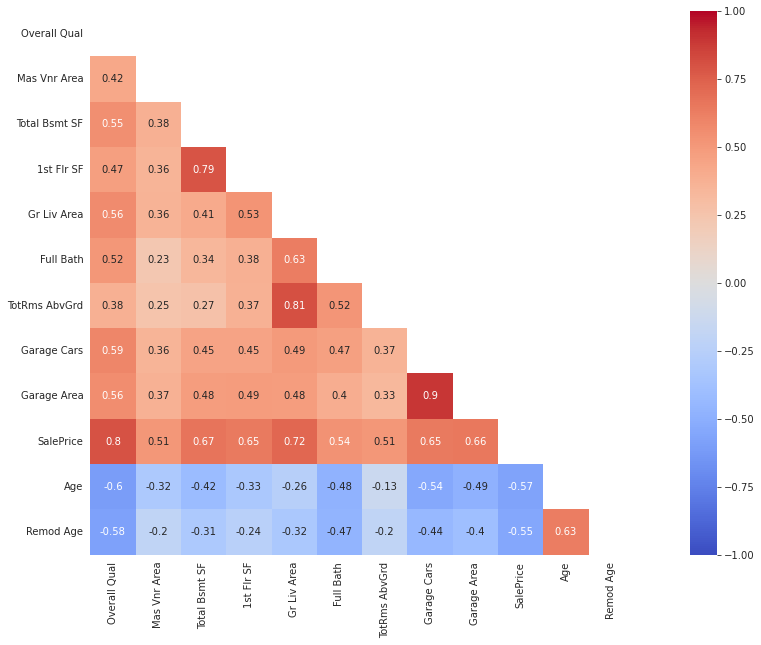

In [78]:
plt.figure(figsize = (20,10))

corr = num_col_corr.corr()

mask  = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    
    sns.heatmap(corr, mask = mask, 
                square = True, 
                vmin = -1, 
                vmax = 1, 
                cmap = "coolwarm", 
                annot = True)

**Features with high correlation with another features**
<br>
Garage Cars - Garage Area = 0.9
<br>
Gr Liv Area - TotRms AbvGrd = 0.81
<br>
Total Bsmt SF - 1st Flr SF = 0.79

Drop one of the two features in each row from the findings above. This is to prevent multicollinearity in the eventual model

In [79]:
ames_house.drop(['Garage Area', 
                 'TotRms AbvGrd', 
                 '1st Flr SF'], 
                axis=1, 
                inplace=True) 

Drop those numerical features with less than 50% correlation in the findings above

In [80]:
ames_house.drop(['PID', 
                 'MS SubClass', 
                 'Lot Area', 
                 'Overall Cond', 
                 'BsmtFin SF 1',
                 'BsmtFin SF 2', 
                 'Bsmt Unf SF', 
                 '2nd Flr SF', 
                 'Low Qual Fin SF',
                 'Bsmt Full Bath', 
                 'Bsmt Half Bath', 
                 'Half Bath', 
                 'Bedroom AbvGr',
                 'Kitchen AbvGr', 
                 'Fireplaces', 
                 'Wood Deck SF', 
                 'Open Porch SF',
                 'Enclosed Porch', 
                 '3Ssn Porch', 
                 'Screen Porch', 
                 'Pool Area', 
                 'Misc Val',
                 'Mo Sold', 
                 'Yr Sold', 
                 'Lot Frontage', 
                 'Garage Age'], 
                axis=1, 
                inplace=True) 

### Diving into categorical columns

Have a basic overview of the categorical columns

In [81]:
ames_cat_col

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,...,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type
0,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,...,SBrkr,Gd,Typ,No Fireplace,Attchd,RFn,TA,TA,Y,WD
1,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,...,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD
2,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,No Fireplace,Detchd,Unf,TA,TA,Y,WD
3,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,...,SBrkr,TA,Typ,No Fireplace,BuiltIn,Fin,TA,TA,Y,WD
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,...,SBrkr,TA,Typ,No Fireplace,Detchd,Unf,TA,TA,N,WD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,...,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,WD
2047,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,SBrkr,TA,Typ,No Fireplace,Detchd,Unf,TA,TA,Y,WD
2048,RL,Pave,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,TA,Typ,TA,Detchd,Unf,Fa,Fa,Y,WD
2049,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,WD


In [82]:
len(ames_cat_col.columns)

38

In [83]:
ames_cat_col['MS Zoning'].value_counts()

RL         1596
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64

#### Create a boxplot function

In [84]:
def subplot_boxplot(dataframe, list_of_columns, list_of_titles):
    
    fig, ax = plt.subplots(nrows=13, 
                           ncols=3, 
                           sharex=False , 
                           sharey=True, 
                           figsize = (20,90))
    
    ax = ax.ravel()
    
    
    for i, column in enumerate(list_of_columns): 
        
        sns.boxplot(data=dataframe, 
                    x=column, 
                    y=ames_house["SalePrice"], 
                    ax=ax[i], 
                    palette='Paired');
        
        ax[i].set_title(list_of_titles[i], fontsize=14)

In [85]:
titles_box = [col for col in ames_cat_col.columns]

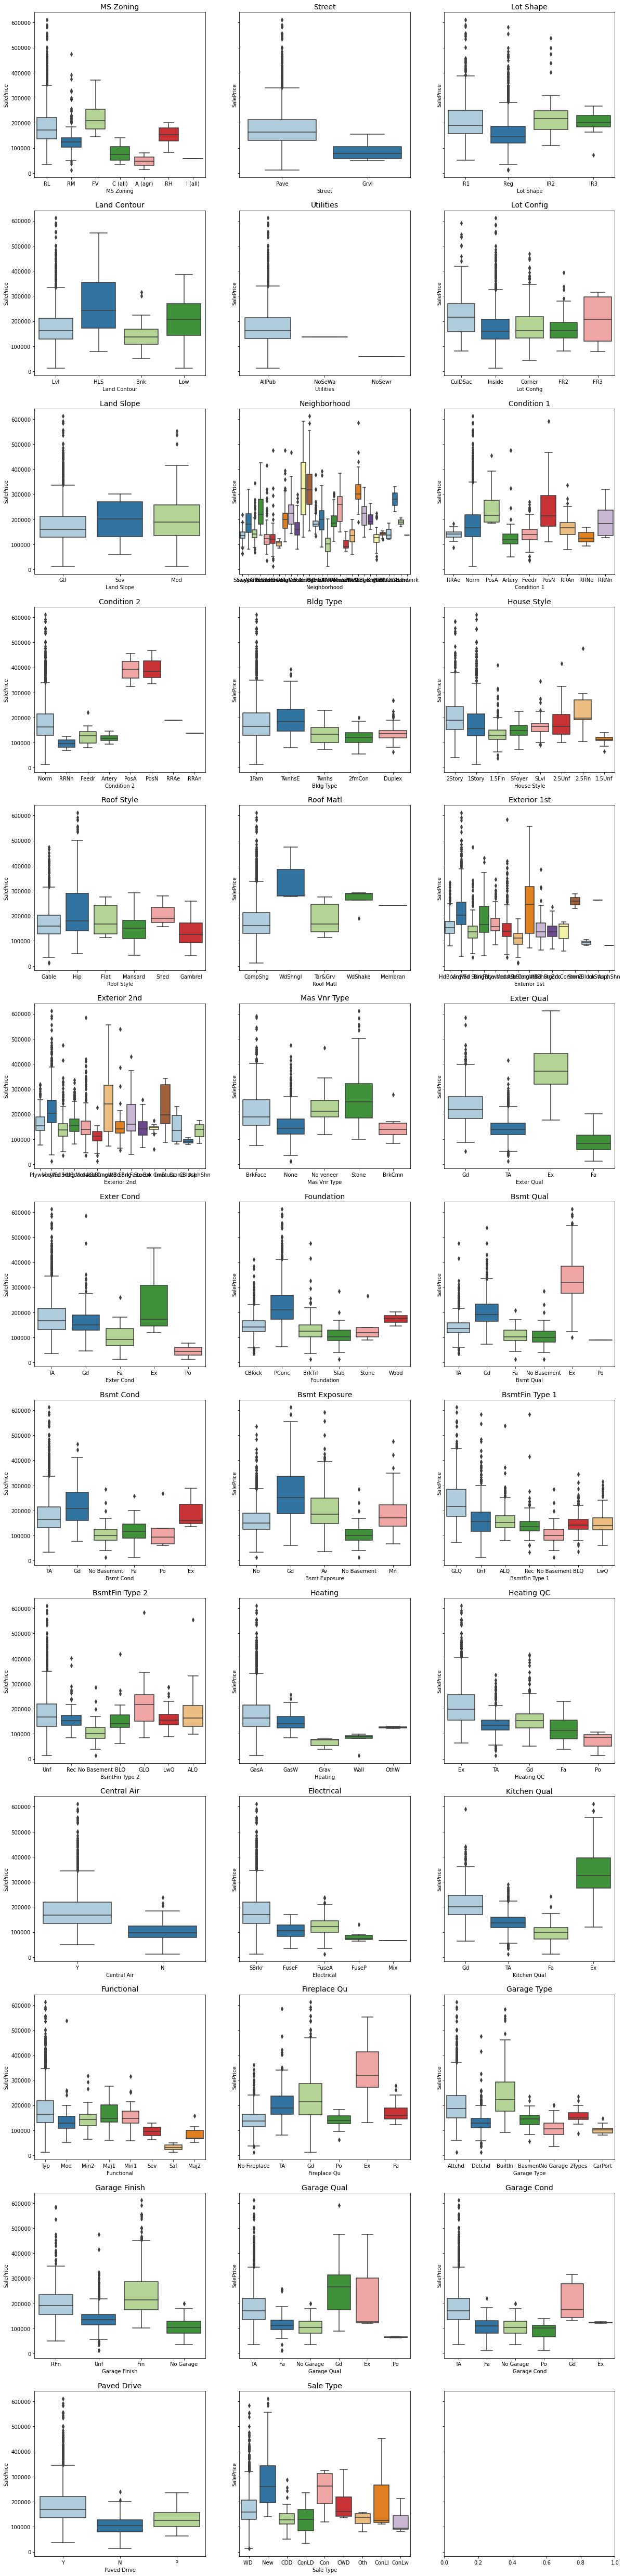

In [86]:
subplot_boxplot(ames_cat_col, ames_cat_col.columns, titles_box)

Based on the box plots, the following 6 features were extracted out due to the lack of variance in the feature itself to be deterministic:
* Utilities
* Lot Config
* Land Slope
* Bldg Type
* Roof Style
* Paved Drive


Bar chart will be plotted for the 6 features above to further investigate on the frequency in the features.

#### Create a subplot function

In [87]:
def subplot_barchart(dataframe, list_of_columns, list_of_titles):
    
    fig, ax = plt.subplots(2, 
                           ncols=3, 
                           sharex=False, 
                           sharey=False, 
                           squeeze=False, 
                           figsize=(20,10))
    
    ax = ax.ravel() 
    
    
    for i, column in enumerate(list_of_columns):
        
        ax[i].bar(dataframe[column].unique(), 
                  dataframe[column].value_counts(),
                  color = 'darkkhaki')
        
        ax[i].set_title(list_of_titles[i], 
                        fontsize = 14)

In [88]:
list_col = ['Utilities', 
            'Lot Config', 
            'Land Slope', 
            'Bldg Type', 
            'Roof Style', 
            'Paved Drive']

In [89]:
titles_bar = [col for col in list_col]

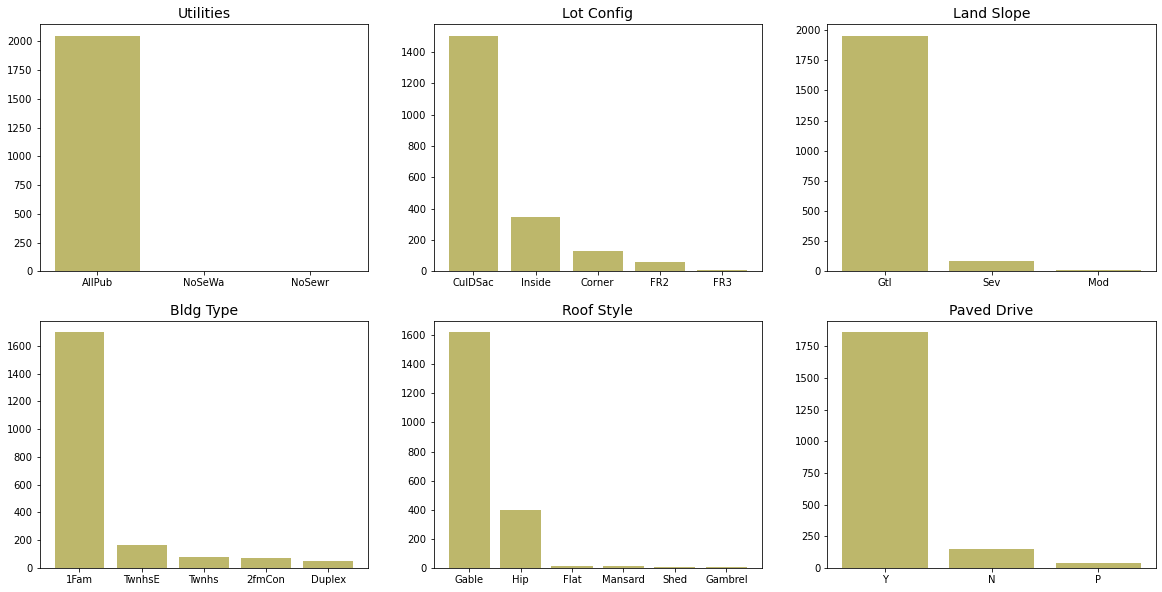

In [90]:
subplot_barchart(ames_cat_col, list_col, titles_bar)

Since there are value with more than 50% of the distribution in the data, these features will not be deterministic.

In [91]:
ames_house.drop(['Utilities', 
                 'Lot Config', 
                 'Land Slope', 
                 'Bldg Type', 
                 'Roof Style', 
                 'Paved Drive'], 
                axis=1, 
                inplace=True)

### Final Dataset to do modelling on 

In [92]:
ames_house.shape

(2049, 42)

In [93]:
ames_house

,Id,MS Zoning,Street,Lot Shape,Land Contour,Neighborhood,Condition 1,Condition 2,House Style,Overall Qual,...,Fireplace Qu,Garage Type,Garage Finish,Garage Cars,Garage Qual,Garage Cond,Sale Type,SalePrice,Age,Remod Age
0,109,RL,Pave,IR1,Lvl,Sawyer,RRAe,Norm,2Story,6,...,No Fireplace,Attchd,RFn,2.0,TA,TA,WD,130500,46,17
1,544,RL,Pave,IR1,Lvl,SawyerW,Norm,Norm,2Story,7,...,TA,Attchd,RFn,2.0,TA,TA,WD,220000,26,25
2,153,RL,Pave,Reg,Lvl,NAmes,Norm,Norm,1Story,5,...,No Fireplace,Detchd,Unf,1.0,TA,TA,WD,109000,69,15
3,318,RL,Pave,Reg,Lvl,Timber,Norm,Norm,2Story,5,...,No Fireplace,BuiltIn,Fin,2.0,TA,TA,WD,174000,16,15
4,255,RL,Pave,IR1,Lvl,SawyerW,Norm,Norm,1.5Fin,6,...,No Fireplace,Detchd,Unf,2.0,TA,TA,WD,138500,122,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,RL,Pave,IR1,HLS,Timber,Norm,Norm,1Story,8,...,Gd,Attchd,Fin,2.0,TA,TA,WD,298751,15,15
2047,785,RL,Pave,IR1,Lvl,Edwards,Norm,Norm,1Story,4,...,No Fireplace,Detchd,Unf,2.0,TA,TA,WD,82500,82,72
2048,916,RL,Pave,Reg,Bnk,Crawfor,Norm,Norm,1.5Fin,6,...,TA,Detchd,Unf,2.0,Fa,Fa,WD,177000,94,72
2049,639,RL,Pave,Reg,Lvl,NAmes,Norm,Norm,1Story,4,...,Gd,Attchd,Unf,1.0,TA,TA,WD,144000,66,66


The final number of features after doing EDA is 42.

### Cleaning the data for the test.csv

In [94]:
ames_house_test = pd.read_csv("./datasets/test.csv")

In [95]:
ames_house_test['Age'] = 2022 - ames_house_test['Year Built']
ames_house_test['Remod Age'] = 2022 - ames_house_test['Year Remod/Add']

In [96]:
ames_house_test.drop(['Pool QC', 
                      'Misc Feature', 
                      'Alley', 
                      'Fence', 
                      'Garage Area', 
                      'TotRms AbvGrd', 
                      '1st Flr SF', 
                      'PID', 
                      'MS SubClass', 
                      'Lot Area', 
                      'Overall Cond', 
                      'BsmtFin SF 1', 
                      'BsmtFin SF 2', 
                      'Bsmt Unf SF', 
                      '2nd Flr SF', 
                      'Low Qual Fin SF',
                      'Bsmt Full Bath', 
                      'Bsmt Half Bath', 
                      'Half Bath', 
                      'Bedroom AbvGr', 
                      'Kitchen AbvGr', 
                      'Fireplaces', 
                      'Garage Yr Blt', 
                      'Wood Deck SF', 
                      'Open Porch SF', 
                      'Enclosed Porch', 
                      '3Ssn Porch', 
                      'Screen Porch',
                      'Pool Area', 
                      'Misc Val', 
                      'Mo Sold', 
                      'Yr Sold', 
                      'Lot Frontage', 
                      'Utilities', 
                      'Lot Config', 
                      'Land Slope', 
                      'Bldg Type', 
                      'Roof Style', 
                      'Paved Drive', 
                      'Year Built', 
                      'Year Remod/Add'],
                     axis=1, 
                     inplace=True)

In [97]:
ames_house_test.isnull().sum()

Id                  0
MS Zoning           0
Street              0
Lot Shape           0
Land Contour        0
Neighborhood        0
Condition 1         0
Condition 2         0
House Style         0
Overall Qual        0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type        1
Mas Vnr Area        1
Exter Qual          0
Exter Cond          0
Foundation          0
Bsmt Qual          25
Bsmt Cond          25
Bsmt Exposure      25
BsmtFin Type 1     25
BsmtFin Type 2     25
Total Bsmt SF       0
Heating             0
Heating QC          0
Central Air         0
Electrical          1
Gr Liv Area         0
Full Bath           0
Kitchen Qual        0
Functional          0
Fireplace Qu      422
Garage Type        44
Garage Finish      45
Garage Cars         0
Garage Qual        45
Garage Cond        45
Sale Type           0
Age                 0
Remod Age           0
dtype: int64

In [98]:
replace_null(ames_house_test, replace_dict)

In [99]:
ames_house_test.isnull().sum()

Id                0
MS Zoning         0
Street            0
Lot Shape         0
Land Contour      0
Neighborhood      0
Condition 1       0
Condition 2       0
House Style       0
Overall Qual      0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Mas Vnr Type      0
Mas Vnr Area      1
Exter Qual        0
Exter Cond        0
Foundation        0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin Type 2    0
Total Bsmt SF     0
Heating           0
Heating QC        0
Central Air       0
Electrical        1
Gr Liv Area       0
Full Bath         0
Kitchen Qual      0
Functional        0
Fireplace Qu      0
Garage Type       0
Garage Finish     0
Garage Cars       0
Garage Qual       0
Garage Cond       0
Sale Type         0
Age               0
Remod Age         0
dtype: int64

In [100]:
ames_house_test['Mas Vnr Area'] = ames_house_test['Mas Vnr Area'].fillna(0.0)

In [101]:
ames_house_test['Electrical'].mode()

0    SBrkr
dtype: object

In [102]:
ames_house_test.loc[634, 'Electrical'] = 'SBrkr'

In [103]:
ames_house_test.isnull().sum().sum()

0

### One Hot Encoding for both train and test csv

One hot encoding for test.csv categorical columns

In [104]:
ames_house_test = pd.get_dummies(columns = ['MS Zoning', 
                                            'Street', 
                                            'Lot Shape', 
                                            'Land Contour', 
                                            'Neighborhood', 
                                            'Condition 1',
                                            'Condition 2', 
                                            'House Style', 
                                            'Roof Matl', 
                                            'Exterior 1st', 
                                            'Exterior 2nd', 
                                            'Mas Vnr Type', 
                                            'Exter Qual', 
                                            'Exter Cond', 
                                            'Foundation', 
                                            'Bsmt Qual', 
                                            'Bsmt Cond', 
                                            'Bsmt Exposure', 
                                            'BsmtFin Type 1', 
                                            'BsmtFin Type 2', 
                                            'Heating', 
                                            'Heating QC', 
                                            'Central Air', 
                                            'Electrical', 
                                            'Kitchen Qual', 
                                            'Functional', 
                                            'Fireplace Qu', 
                                            'Garage Type', 
                                            'Garage Finish', 
                                            'Garage Qual', 
                                            'Garage Cond', 
                                            'Sale Type'],
                                 
                              drop_first = True, 
                              data = ames_house_test)

In [105]:
len(ames_house_test.columns)

187

<br>
One hot encoding for train.csv categorical columns

In [106]:
ames_house_cat = ames_house.drop(ames_house.select_dtypes(exclude=['object']).columns, axis=1)

In [107]:
ames_house_cat.columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Neighborhood',
       'Condition 1', 'Condition 2', 'House Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual',
       'Garage Cond', 'Sale Type'],
      dtype='object')

In [108]:
ames_house = pd.get_dummies(columns = ['MS Zoning', 
                                       'Street', 
                                       'Lot Shape', 
                                       'Land Contour', 
                                       'Neighborhood', 
                                       'Condition 1',
                                       'Condition 2', 
                                        'House Style', 
                                       'Roof Matl', 
                                       'Exterior 1st', 
                                       'Exterior 2nd',
                                       'Mas Vnr Type', 
                                       'Exter Qual', 
                                       'Exter Cond', 
                                       'Foundation', 
                                       'Bsmt Qual', 
                                       'Bsmt Cond', 
                                       'Bsmt Exposure', 
                                       'BsmtFin Type 1', 
                                       'BsmtFin Type 2', 
                                       'Heating', 
                                       'Heating QC', 
                                       'Central Air', 
                                       'Electrical', 
                                       'Kitchen Qual', 
                                       'Functional', 
                                       'Fireplace Qu',
                                       'Garage Type', 
                                       'Garage Finish', 
                                       'Garage Qual', 
                                       'Garage Cond', 
                                       'Sale Type'],
                            
                              drop_first = True, 
                              data = ames_house)

In [109]:
ames_house.isnull().sum().sum()

0

In [110]:
ames_house.shape

(2049, 201)

<br>
Declare y first before

In [111]:
y = ames_house['SalePrice']

## Preprocessing and Modeling
---

Check the intersection columns between the 2 csv

In [112]:
cols_intersect = set(ames_house.columns).intersection(set(ames_house_test.columns))

In [113]:
ames_house = ames_house[list(cols_intersect)]
ames_house_test = ames_house_test[list(cols_intersect)]

In [114]:
ames_house.shape, ames_house_test.shape

((2049, 178), (878, 178))

### Train Test Split

In [115]:
X = ames_house

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [117]:
X_train.shape, y_train.shape

((1639, 178), (1639,))

In [118]:
X_test.shape, y_test.shape

((410, 178), (410,))

### Baseline Model

In [119]:
y_pred = y_train.mean()

In [120]:
resids = y_test - y_pred

In [121]:
null_mse = np.mean((resids)**2)

In [122]:
null_rmse = (null_mse)**0.5
null_rmse 

77296.52524199558

### Scaling

In [123]:
ss = StandardScaler()

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

### Linear Regression model

In [124]:
# Instantiate linear regression model

lr = LinearRegression()
lr.fit(X_train_sc, y_train)

LinearRegression()

In [125]:
lr_score_train = lr.score(X_train_sc, y_train)
lr_score_train

0.9210311522106592

In [126]:
lr_score_test = lr.score(X_test_sc, y_test)
lr_score_test

0.8967747047452289

In [127]:
lr_cv_score = cross_val_score(lr, 
                              X_train_sc, 
                              y_train, 
                              cv = 5).mean()

lr_cv_score

-2.2856105640160602e+25

In [128]:
lr_nmse = cross_val_score(lr, 
                          X_train_sc, 
                          y_train, 
                          scoring = 'neg_mean_squared_error', 
                          cv = 5).mean()

In [129]:
lr_nmse = np.sqrt(-lr_nmse)
lr_nmse

3.993135068877397e+17

### Ridge Model

In [130]:
# Using Ridge cv to find optimal alpha

ridge_alphas = np.logspace(0, 5, 200)

ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   cv=10)

ridge_cv.fit(X_train_sc, y_train)

RidgeCV(alphas=array([1.00000000e+00, 1.05956018e+00, 1.12266777e+00, 1.18953407e+00,
       1.26038293e+00, 1.33545156e+00, 1.41499130e+00, 1.49926843e+00,
       1.58856513e+00, 1.68318035e+00, 1.78343088e+00, 1.88965234e+00,
       2.00220037e+00, 2.12145178e+00, 2.24780583e+00, 2.38168555e+00,
       2.52353917e+00, 2.67384162e+00, 2.83309610e+00, 3.00183581e+00,
       3.18062569e+00, 3.37006433e+0...
       2.64308149e+04, 2.80050389e+04, 2.96730241e+04, 3.14403547e+04,
       3.33129479e+04, 3.52970730e+04, 3.73993730e+04, 3.96268864e+04,
       4.19870708e+04, 4.44878283e+04, 4.71375313e+04, 4.99450512e+04,
       5.29197874e+04, 5.60716994e+04, 5.94113398e+04, 6.29498899e+04,
       6.66991966e+04, 7.06718127e+04, 7.48810386e+04, 7.93409667e+04,
       8.40665289e+04, 8.90735464e+04, 9.43787828e+04, 1.00000000e+05]),
        cv=10)

In [131]:
ridge_optimal_alpha = ridge_cv.alpha_

In [132]:
# Instantiate Ridge model

ridge = Ridge(alpha = ridge_optimal_alpha)

In [133]:
ridge.fit(X_train_sc, y_train)

Ridge(alpha=27.049597304631355)

In [134]:
ridge_score_train = ridge.score(X_train_sc, y_train)
ridge_score_train

0.9197730300942619

In [135]:
ridge_score_test = ridge.score(X_test_sc, y_test)
ridge_score_test

0.9003549223225601

In [136]:
ridge_cv_score = cross_val_score(ridge, 
                                 X_train_sc,
                                 y_train, 
                                 cv = 5).mean()

ridge_cv_score

0.8925039846110451

In [137]:
ridge_nmse = cross_val_score(ridge, 
                             X_train_sc,
                             y_train, 
                             scoring = 'neg_mean_squared_error', 
                             cv = 5).mean()

In [138]:
ridge_rmse = np.sqrt(-ridge_nmse)
ridge_rmse

25990.10524928891

### Lasso Model

In [139]:
# Using Lasso cv to find optimal alpha

lasso_cv = LassoCV(n_alphas=500, cv=10)
lasso_cv.fit(X_train_sc, y_train)

LassoCV(cv=10, n_alphas=500)

In [140]:
lasso_optimal_alpha = lasso_cv.alpha_

In [141]:
# Instantiate Lasso model

lasso = Lasso(alpha= lasso_optimal_alpha)

In [142]:
lasso.fit(X_train_sc, y_train)

Lasso(alpha=186.49260888114)

In [143]:
lasso_score_train = lasso.score(X_train_sc, y_train)
lasso_score_train

0.9173230965842667

In [144]:
lasso_score_test = lasso.score(X_test_sc, y_test)
lasso_score_test

0.90228759693215

In [145]:
lasso_cv_score = cross_val_score(lasso, 
                                 X_train_sc, 
                                 y_train, 
                                 cv = 5).mean()

lasso_cv_score

0.8940309305548073

In [146]:
lasso_nmse = cross_val_score(lasso, 
                             X_train_sc, 
                             y_train, 
                             scoring = 'neg_mean_squared_error', 
                             cv = 5).mean()


In [147]:
lasso_rmse = np.sqrt(-lasso_nmse)
lasso_rmse

25811.4265917059

In [148]:
features = [col for col in ames_house]

In [149]:
len(features)

178

## Model Comparison

In [150]:
models = ["Baseline", "Linear", "Ridge", "Lasso"]

In [151]:
cross_val_scores = ["NA", lr_cv_score, ridge_cv_score, lasso_cv_score]

In [152]:
train_scores = ["NA", lr_score_train, ridge_score_train, lasso_score_train]

In [153]:
test_scores = ["NA", lr_score_test, ridge_score_test, lasso_score_test]

In [154]:
rmse_scores = [null_rmse, lr_nmse, ridge_rmse, lasso_rmse]

In [155]:
alphas = ["NA", "NA", ridge_optimal_alpha, lasso_optimal_alpha]

In [156]:
model_comparision = pd.DataFrame({"models": models, 
                                  "cross val score": cross_val_scores,
                                  "train scores": train_scores, 
                                  "test scores": test_scores, 
                                  "RMSE": rmse_scores,
                                  "alphas": alphas
                                 })

In [157]:
model_comparision.set_index("models")

,cross val score,train scores,test scores,RMSE,alphas
models,,,,,
Baseline,NA,NA,NA,7.729653e+04,NA
Linear,-22856105640160602429063168.0,0.921031,0.896775,3.993135e+17,NA
Ridge,0.892504,0.919773,0.900355,2.599011e+04,27.049597
Lasso,0.894031,0.917323,0.902288,2.581143e+04,186.492609


Observations from the comparison above:
* Cross Validation Score for Lasso is slightly better compared to Ridge.
* Lasso test score is slightly better compared to Ridge.
* The RMSE is lower for Lasso compared to Ridge as well.
* Using the RMSE, Lasso has performed way better compared to the baseline model. 
* Based on the results above, Linear model oversimplifies. A linear model was used to plot on data that is non-linear. The R2 score is 0.89 due to the high number of features utilized in the modeling. 
* The difference between Ridge and Lasso score is not huge. This is because the Ridge model reduce the coefficients of the features to near zero but never zero. While, Lasso assign a zero to features that are not useful for prediction

Hence, Lasso Model performed best among the models and will be the chosen model

## Diving into Lasso Model

In [158]:
df_lasso_coef = pd.DataFrame({"features":features, 
                              "coef":lasso_cv.coef_
                             })

In [159]:
df_lasso_coef_abs = pd.DataFrame({"features":features, 
                                  "coef":abs(lasso_cv.coef_)
                                 })

<br>
Check on the number of features remaining after lasso modeling

In [160]:
df_lasso_coef[abs(df_lasso_coef['coef']) > 0]

,features,coef
0,Condition 1_Norm,2155.010441
1,Garage Finish_RFn,-1036.959322
2,Central Air_Y,257.162290
3,Sale Type_CWD,925.228122
5,Heating QC_TA,-2349.910037
...,...,...
172,Age,-5102.480704
174,Sale Type_ConLD,116.648282
175,Foundation_Slab,-1457.374887
176,Bsmt Cond_Gd,1025.992787


After lasso modeling, there are **130 features** left.

<br>
Top features that are positively correlated with sale price

In [161]:
df_lasso_coef[abs(df_lasso_coef['coef']) > 0].sort_values(by = 'coef', ascending=False).head(10)

,features,coef
78,Gr Liv Area,25937.302896
99,Total Bsmt SF,12249.713710
163,Overall Qual,10621.941265
117,Sale Type_New,5276.379102
84,Functional_Typ,5259.752110
139,Bsmt Exposure_Gd,5204.154098
164,Mas Vnr Area,4881.645485
23,Garage Cars,4785.426247
95,Neighborhood_NridgHt,4325.774705
24,Neighborhood_NoRidge,4256.864354


<br>
Top features that are negatively correlated with sale price

In [162]:
df_lasso_coef[abs(df_lasso_coef['coef']) > 0].sort_values(by = 'coef', ascending=True).head(10)

,features,coef
145,Exter Qual_TA,-12974.329643
38,Kitchen Qual_TA,-12847.974994
41,Kitchen Qual_Gd,-11624.083276
110,Exter Qual_Gd,-11148.611538
170,Bsmt Qual_Gd,-9029.944355
75,Bsmt Qual_TA,-7258.556035
172,Age,-5102.480704
28,BsmtFin Type 1_Unf,-4934.133513
89,Remod Age,-4023.720864
81,Kitchen Qual_Fa,-3933.422918


<br>
Features with the greatest magnitude

In [163]:
df_lasso_coef_abs.sort_values(by = 'coef', ascending=False).head(10)

,features,coef
78,Gr Liv Area,25937.302896
145,Exter Qual_TA,12974.329643
38,Kitchen Qual_TA,12847.974994
99,Total Bsmt SF,12249.713710
41,Kitchen Qual_Gd,11624.083276
110,Exter Qual_Gd,11148.611538
163,Overall Qual,10621.941265
170,Bsmt Qual_Gd,9029.944355
75,Bsmt Qual_TA,7258.556035
117,Sale Type_New,5276.379102


## Kaggle 

In [164]:
ames_house_test_sc = ss.transform(ames_house_test)

In [165]:
pred = lasso.predict(ames_house_test_sc)

In [166]:
kaggle_test = zip(ames_house_test['Id'], pred)

In [167]:
kaggle_test = pd.DataFrame(kaggle_test, columns = ["Id", "SalePrice"])

In [168]:
kaggle_test.shape

(878, 2)

In [169]:
kaggle_test.to_csv('./datasets/submission_chh.csv', index=False)

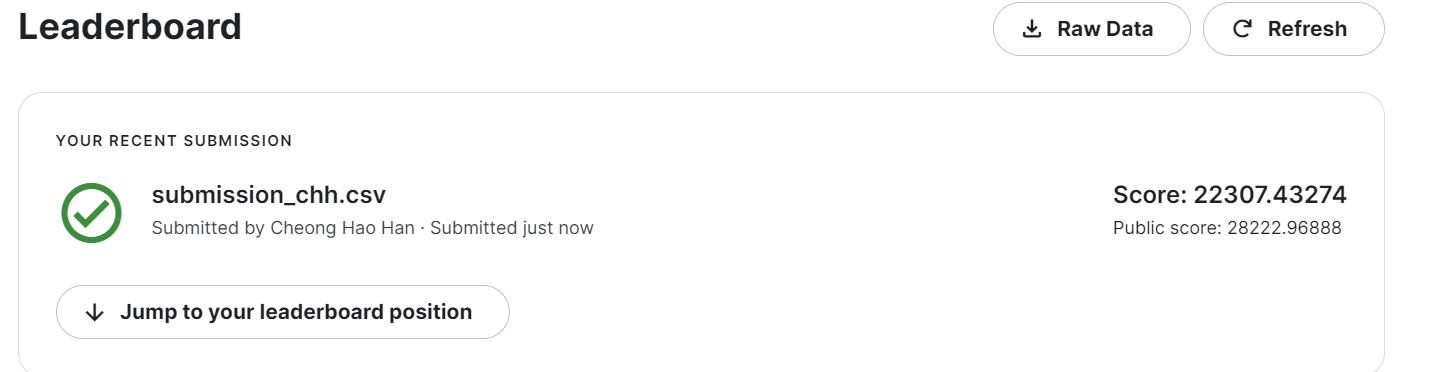

## Conclusion and Recommendations
---

### Conclusion

With the findings above, the above ground living area square feet is the most important feature to increase the salesprice. Followed by the total basement square feet, then the overall quality (material and finish of the house).

* With 1 square feet increase in the ground living area, the sale price will increase by ~26,000.
* With 1 square feet increase in the total basement, the sale price will increase by 12,230.
* With 1 rating increase in the overall quality, the sale price will increase by 10,734.

On the contrary, the features that will reduce the sale price are kitchen quality, basement quality, age of the house and the quality of the material in the exterior.

### Recommendations

The recommendation is to sell the house as soon as possible once the appropriate enhancements to the house have been done. 

<br>

The appropriate enhancements:
* Increase the ground living area
* Increase the basement square feet
* Improve on the material and finish of the house
* Improve the kitchen quality
* Improve on the basement quality